<font size="6">**Ambient Noise Inter Station Cross-Correlation** </font>

<font size="5">Importing Libraries </font>

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from datetime import datetime 
from natsort import natsorted
from obspy import read
from obspy.signal.cross_correlation import correlate
from obspy.signal.filter import bandpass
from obspy import Trace, UTCDateTime
from obspy.geodetics.base import calc_vincenty_inverse

<font size="5">Path for Directories </font>

In [2]:
#Directory of Network which have folders of Stations (Input) 
Main_Path="/home/sig/Mohit/Data10/Norm/"

# Directory for saving Stacked data (Output)
Stack_Path="/home/sig/Mohit/StackData"

In [6]:
#If want to cross-correlate each stations
Station_list = natsorted(os.listdir(Main_Path))  

#OR

#If want to cross-correlate specific stations type name mannualy
#Station_list=["MARM","MORT2","PENM","PGVM","POBM","PPLM","PVMO","STAM","WADM"]

print(" Staion names :",Station_list, "\n","Total no. of Station :", len(Station_list))

 Staion names : ['MARM', 'MORT2', 'PENM', 'PGVM', 'POBM', 'PPLM', 'PVMO', 'STAM', 'WADM'] 
 Total no. of Station : 9


<font size="5">Calculations </font>

Station 1 : MARM  |  Station 2 : MORT2
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.MORT2.EHZ.SAC


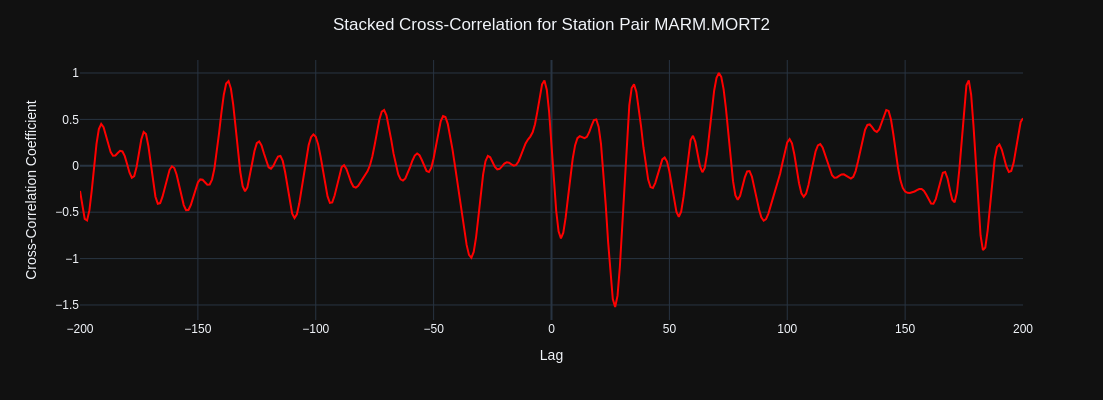

Station 1 : MARM  |  Station 2 : PENM
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.PENM.EHZ.SAC


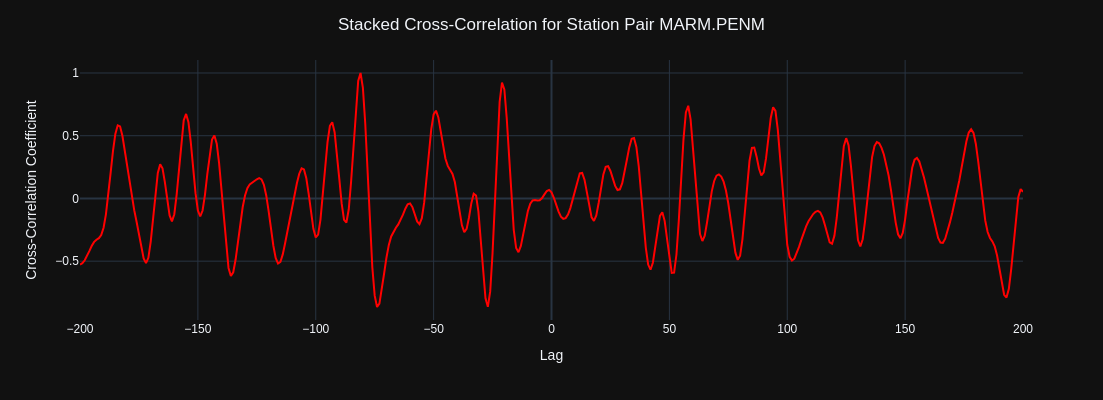

Station 1 : MARM  |  Station 2 : PGVM
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.PGVM.EHZ.SAC


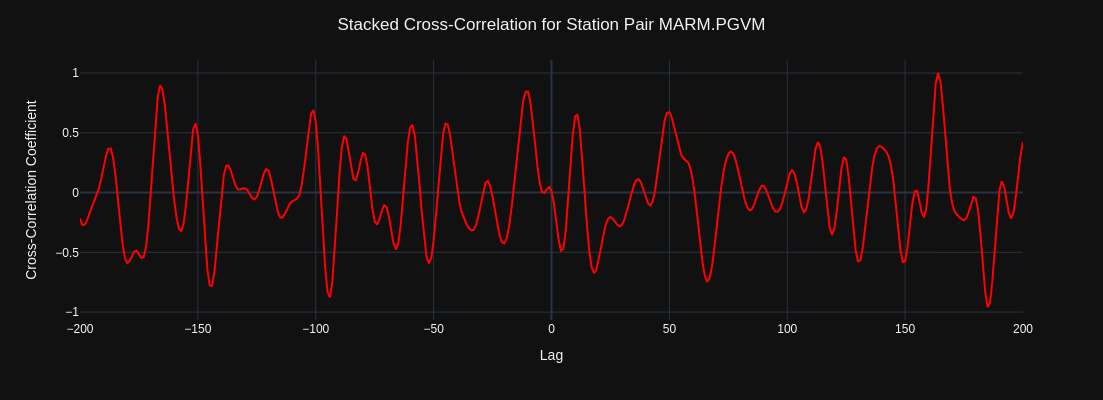

Station 1 : MARM  |  Station 2 : POBM
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.POBM.EHZ.SAC


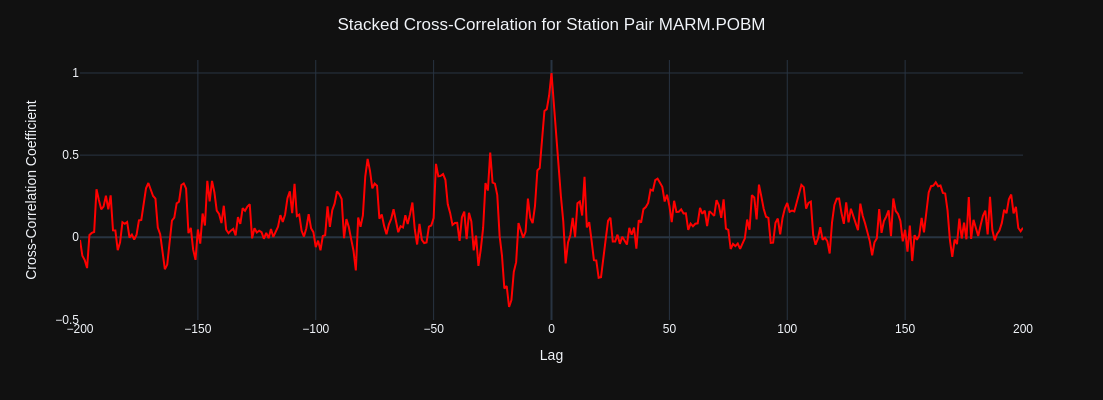

Station 1 : MARM  |  Station 2 : PPLM
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.PPLM.EHZ.SAC


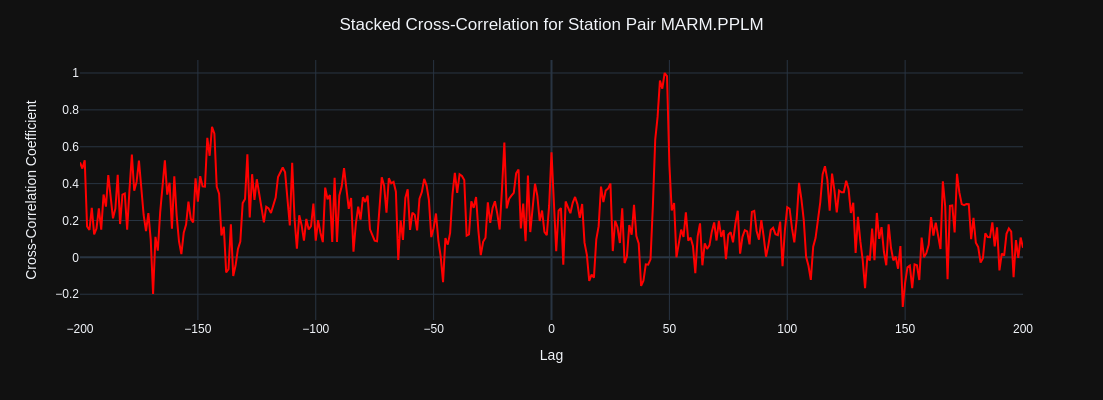

Station 1 : MARM  |  Station 2 : PVMO
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.PVMO.EHZ.SAC


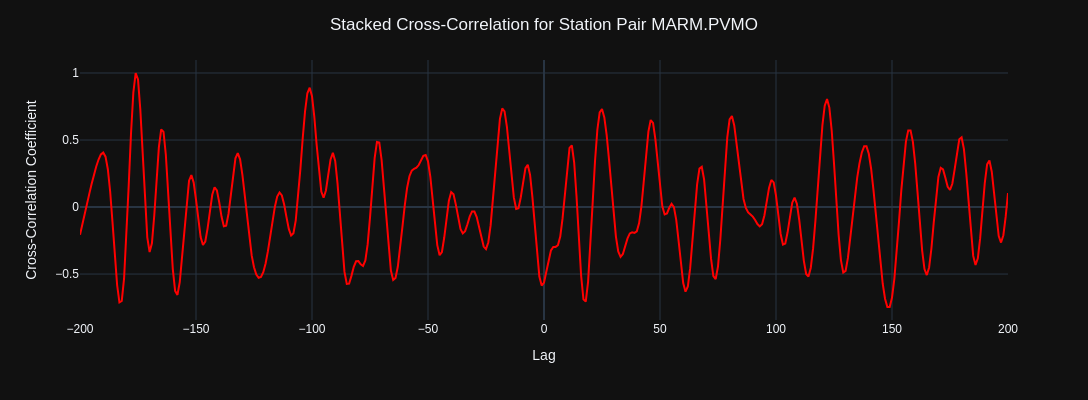

Station 1 : MARM  |  Station 2 : STAM
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.STAM.EHZ.SAC


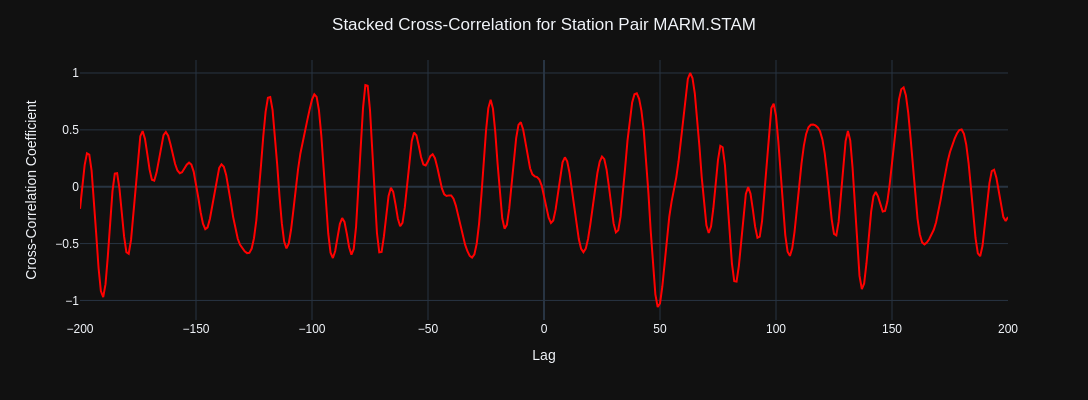

Station 1 : MARM  |  Station 2 : WADM
SAC file saved as /home/sig/Mohit/StackData/NM.MARM.WADM.EHZ.SAC


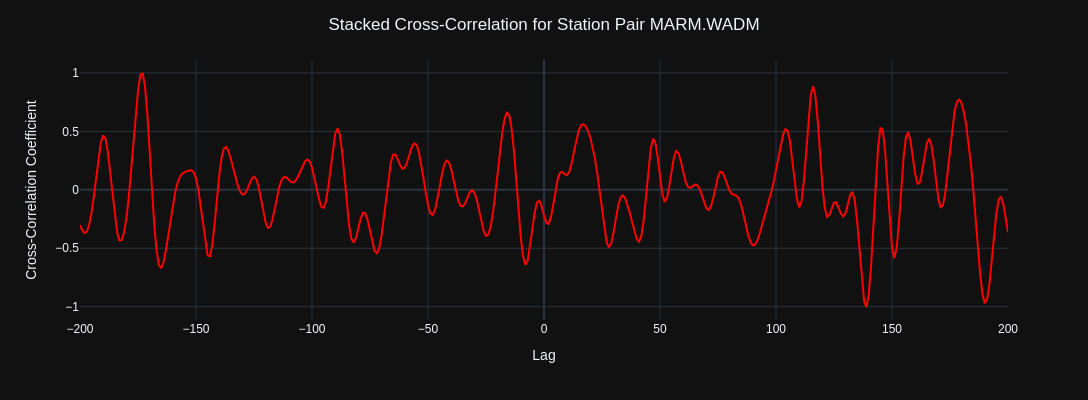

Station 1 : MORT2  |  Station 2 : PENM
SAC file saved as /home/sig/Mohit/StackData/NM.MORT2.PENM.EHZ.SAC


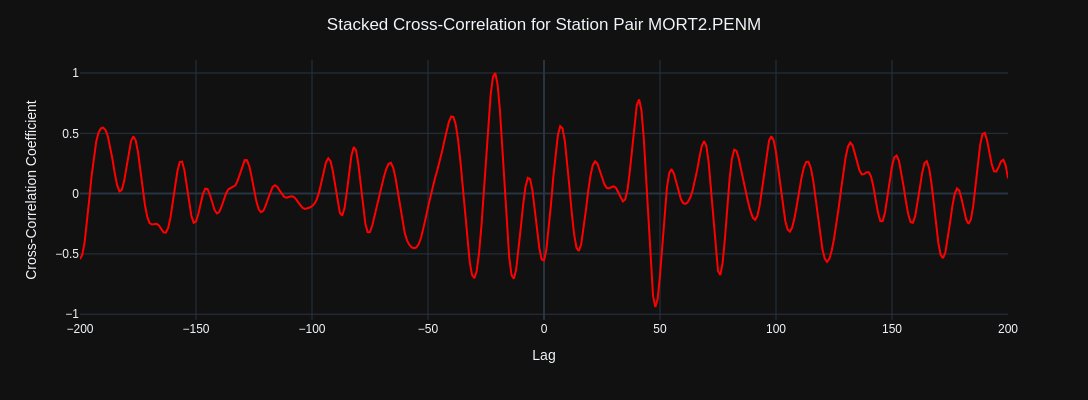

Station 1 : MORT2  |  Station 2 : PGVM
SAC file saved as /home/sig/Mohit/StackData/NM.MORT2.PGVM.EHZ.SAC


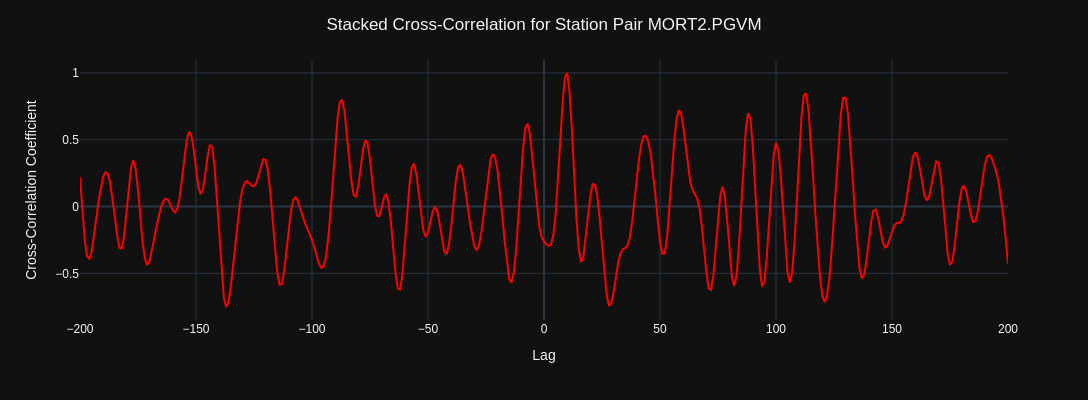

Station 1 : MORT2  |  Station 2 : POBM
SAC file saved as /home/sig/Mohit/StackData/NM.MORT2.POBM.EHZ.SAC


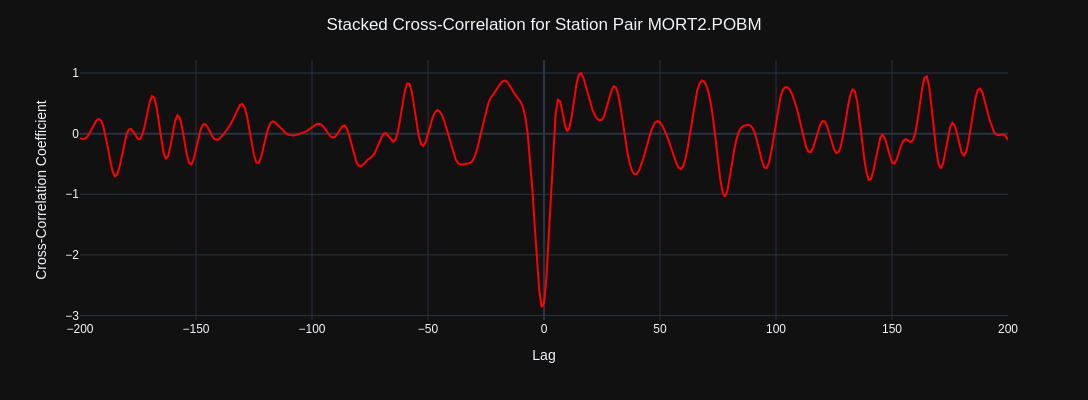

Station 1 : MORT2  |  Station 2 : PPLM


In [ ]:
for i in range(len(Station_list)-1):
    STN1=Station_list[i]                   #Name of First Station
    
    for j in range(i+1,len(Station_list)):
        STN2=Station_list[j]                                 #Name of Second Station
        print("Station 1 :",STN1," | ","Station 2 :",STN2)
        
        #Path for Station1 files 
        path1=os.path.join(Main_Path, STN1)
        contents1 = os.listdir(path1)
        filenames1=natsorted(contents1)

        #Extracting Julian days of Station1
        Dates1=[]
        for filename1 in filenames1:
            julian_days1 = filename1.split('.')[3] + '.' + filename1.split('.')[4]
            Dates1.append(julian_days1)
        
        #print(Dates1)

        #Path for Station2 files 
        path2=os.path.join(Main_Path, STN2)
        contents2 = os.listdir(path2)
        filenames2=natsorted(contents2)

        #Extracting Julian days of Station2
        Dates2=[]
        for filename2 in filenames2:
            julian_days2 = filename2.split('.')[3] + '.' + filename2.split('.')[4]
            Dates2.append(julian_days2)
        
        #print(Dates2)
        #print(path1,path2)
        
        #Extracting Common Dates of between Station1 and Station2
        Common_Dates = np.intersect1d(Dates1, Dates2)
        Length_Common_Dates=len(Common_Dates)
        #print(Common_Dates)

        
        #Storing Common dates files names of Station1 and Station2
        Data1=[]
        for k in range(len(filenames1)):
            if Dates1[k] in Common_Dates:
                Data1.append(filenames1[k])

        Data2=[]
        for l in range(len(filenames2)):
            if Dates2[l] in Common_Dates:
                Data2.append(filenames2[l])

        ###################################################################################################################################

        #Reading SAC files and Storing Values in Variables
        
        Trace1=[]  
        signal1=[]
        for p in range(len(Data1)):
            path3 = os.path.join(path1, Data1[p])
            trace1 = read(path3)[0]
            Trace1.append(trace1)
            signal1.append(trace1.data)     #Storing Counts of Station1 (Y-Axis values)
            
        Trace2=[]
        signal2=[]
        for q in range(len(Data2)):
            path4 = os.path.join(path2,Data2[q])
            trace2 = read(path4)[0]
            Trace2.append(trace2)
            signal2.append(trace2.data)     #Storing Counts of Station2 (Y-Axis values)

        ######################################################################################################################################

        #Cross_Correlation and Stacking
        Cross = []
        Lags=[]
        for x in range(len(signal1)):
            if len(signal1[x]) != len(signal2[x]):                #Checking If signal1 and signal2 have equal data points
                min_len = min(len(signal1[x]), len(signal2[x]))
                signal1[x] = signal1[x][:min_len]
                signal2[x] = signal2[x][:min_len]

                #Appling BandPass
                signal1[x]=bandpass(signal1[x], 0.0125, 0.1, 1)
                signal2[x]=bandpass(signal2[x], 0.0125, 0.1, 1)
        
            #Calculating Cross-Correlation
            cr = correlate(signal1[x], signal2[x],200, method="fft")  # Adjust window length if needed
            Cross.append(cr)
            
            Lag = np.arange(-len(cr) // 2 + 1, len(cr) // 2 + 1)
            Lags.append(Lag)
            
            # Debugging Output
            #print(f"Cross-correlation {x}: Peak value = {max(cr)}, Index of Peak = {cr.argmax()}")  

        #Stacking ALL Cross_correlations of both Stations
        Stack=np.sum(Cross,axis=0)/len(Cross)
        #Normalizing Stacking with its max value
        Stack=Stack/np.max(Stack)

        ######################################################################################################################################
        #Saving Stacked Data as SAC file format
       
        # Create a Trace object reading Stacked Data points
        trace = Trace(data=Stack)

        #Adding Headers into SAC file
        # Set the metadata for the SAC file
        trace.stats.network =  trace1.stats.network # network code
        trace.stats.station = f"{STN1}.{STN2}"  # station code
        trace.stats.location = trace1.stats.location  # location code
        trace.stats.channel = trace1.stats.channel  # channel code
        trace.stats.starttime = datetime.now()  # Set to current time or specify
        trace.stats.sac = {}
        
        # Define the sampling rate and set additional SAC headers
        dt = Lag[1] - Lag[0]  # Time difference between lags
        trace.stats.sampling_rate = 1.0 / dt

        # Get the current time
        current_time = datetime.now()
        
        # Update SAC header fields with current time
        trace.stats.sac['nzyear'] = current_time.year
        trace.stats.sac['nzjday'] = current_time.timetuple().tm_yday  # Julian day
        trace.stats.sac['nzhour'] = current_time.hour
        trace.stats.sac['nzmin'] = current_time.minute
        trace.stats.sac['nzsec'] = current_time.second
        trace.stats.sac['nzmsec'] = int(current_time.microsecond / 1000)  # Milliseconds
        
        trace.stats.sac = {}
        # Set the reference lag 
        trace.stats.sac['b'] = Lag[0]  # Start time of the trace (beginning lag)
        trace.stats.sac['e'] = Lag[-1]  # End time of the trace (end lag)

        #Calculate distance, azimuth, and backazimuth
        distance, azimuth, backazimuth = calc_vincenty_inverse(trace1.stats.sac['stla'], trace1.stats.sac['stlo'], trace2.stats.sac['stla'], trace2.stats.sac['stlo'])
        trace.stats.sac['dist'] = distance/1000
        trace.stats.sac['az'] = azimuth
        trace.stats.sac['baz'] = backazimuth

        # Optional: set other SAC headers, such as user-defined variables, if needed
        #trace.stats.sac['user0'] = 0  # Example: custom user-defined header value
        trace.stats.sac['kevnm'] = 'STACKED'
        
        # Write to a SAC file
        NET = trace1.stats.network
        CMP = trace1.stats.channel

        # Construct the filename structure
        filename = f"{NET}.{STN1}.{STN2}.{CMP}.SAC"
        
        #Giving Path to store output Stacked file
        output_filename = os.path.join(Stack_Path, filename)
        
        # Write to the specified path with the constructed filename
        trace.write(output_filename, format="SAC")
        print(f"SAC file saved as {output_filename}")

        #Ploting Stacked Cross_correlation of Station1 and Station2
        # plt.figure(figsize=(10, 2)) 
        # plt.plot(Lag,Stack,'k')
        # plt.title(f'Cross-Correlation for Station Pair {STN1}.{STN2}')
        # plt.show()
        
        fig = px.line(x=Lag, y=Stack)
        # Update the trace to change the line color 
        fig.update_traces(line=dict(color='red'))
        # Set the title and labels
        fig.update_layout(
            title=f'Stacked Cross-Correlation for Station Pair {STN1}.{STN2}', title_x=0.5,
            xaxis_title='Lag',
            yaxis_title='Cross-Correlation Coefficient' ,
            template='plotly_dark',
            width=1000,
            height=400)
        fig.show()         